In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x108208f70>)

In [5]:
!pip install pandas --quiet

In [6]:
import pandas as pd

In [7]:
medical_df = pd.read_csv('medical.csv')

In [8]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
!pip install plotly matplotlib seaborn --quiet

In [12]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [14]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [15]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

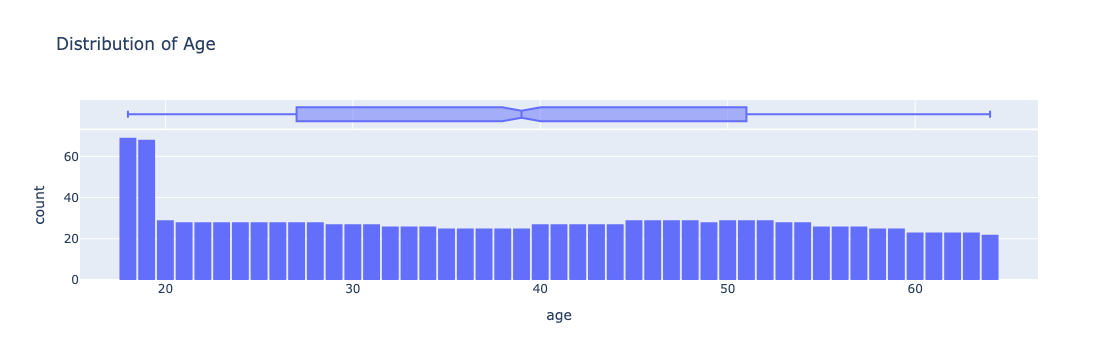

In [16]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
mean_age = medical_df['age'].mean()

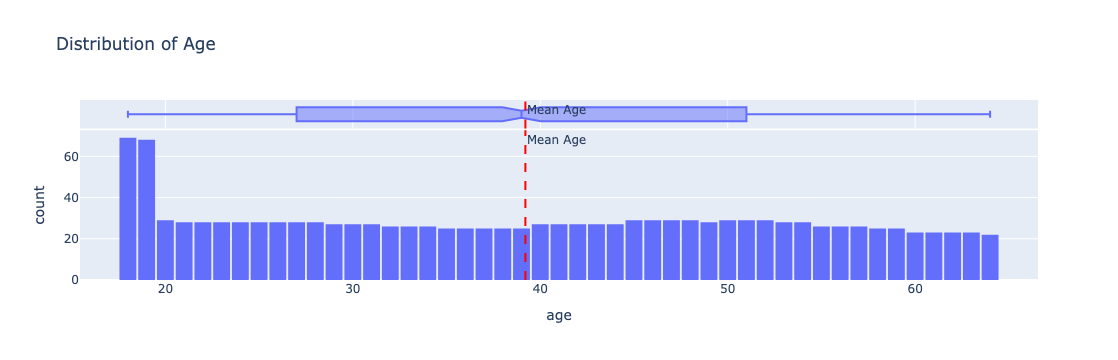

In [18]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.add_vline(x=mean_age, line_dash="dash",
                   line_color="red",
                   annotation_text="Mean Age")
fig.update_layout(bargap=0.1)
fig.show()


In [19]:
print(mean_age)

39.20702541106129


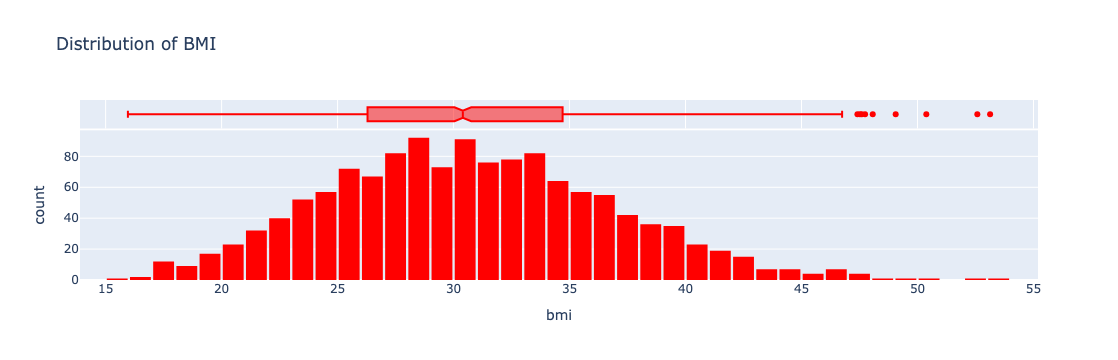

In [20]:
fig = px.histogram(medical_df,
                  x='bmi',
                  marginal='box',
                  color_discrete_sequence=['red'],
                  title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

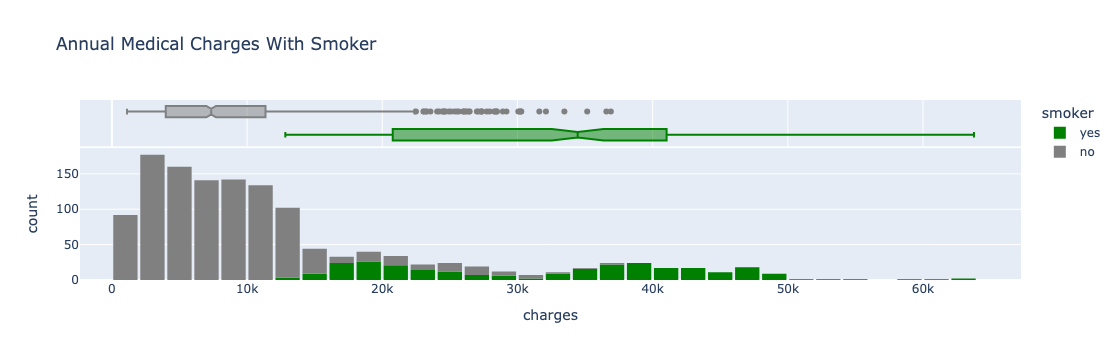

In [21]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='smoker',
                  color_discrete_sequence=['green','grey'],
                  title='Annual Medical Charges With Smoker')
fig.update_layout(bargap=0.1)
fig.show()

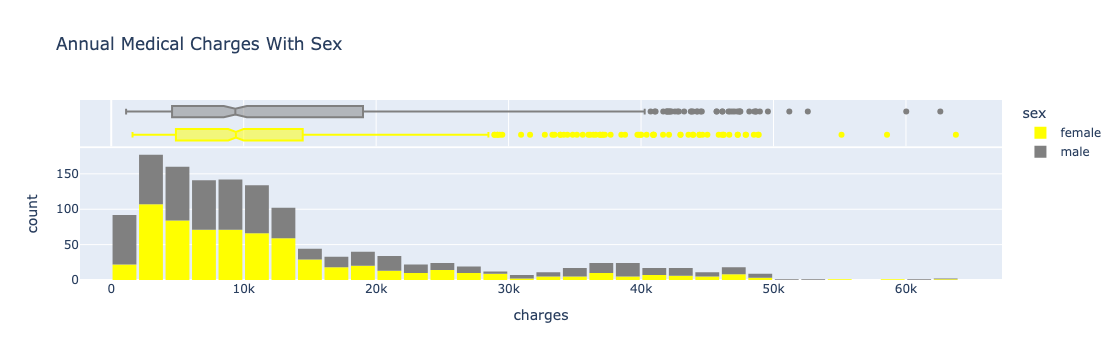

In [22]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='sex',
                  color_discrete_sequence=['yellow','grey'],
                  title='Annual Medical Charges With Sex')
fig.update_layout(bargap=0.1)
fig.show()

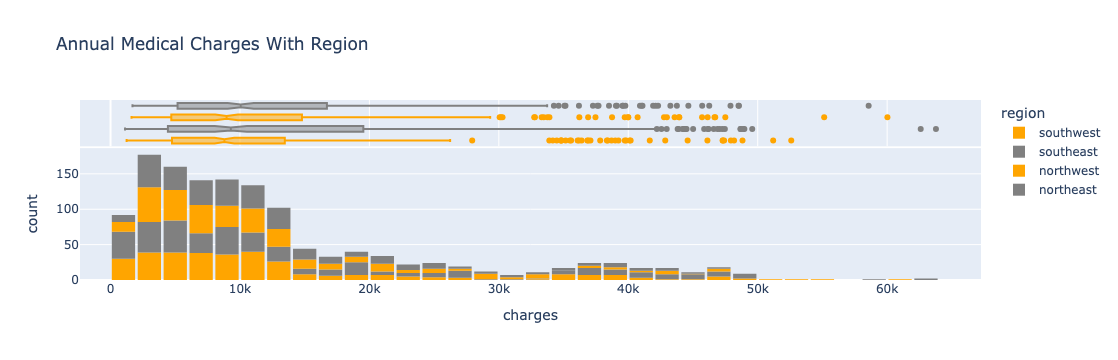

In [23]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='region',
                  color_discrete_sequence=['orange','grey'],
                  title='Annual Medical Charges With Region')
fig.update_layout(bargap=0.1)
fig.show()

In [24]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

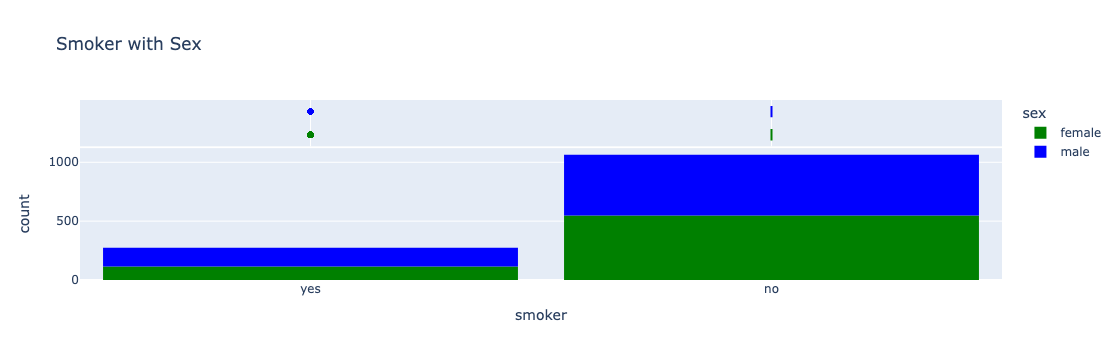

In [25]:
fig = px.histogram(medical_df,
                  x='smoker',
                  marginal='box',
                  color='sex',
                  color_discrete_sequence=['green','blue'],
                  title='Smoker with Sex')
fig.update_layout(bargap=0.1)
fig.show()

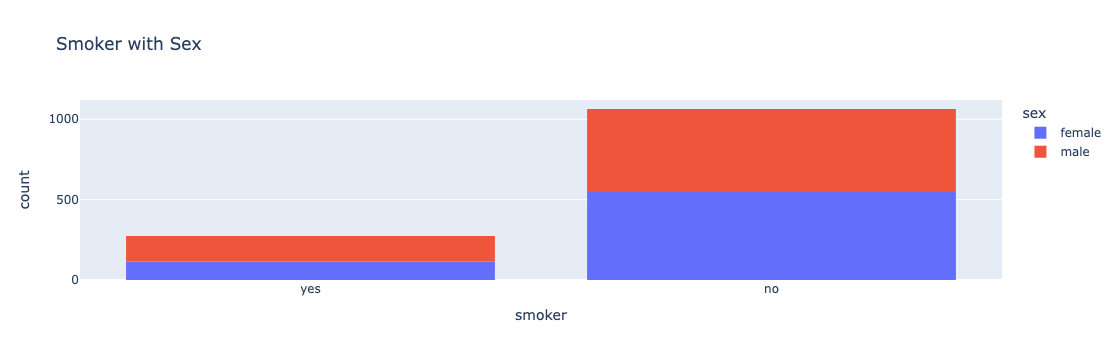

In [26]:
px.histogram(medical_df,
            x='smoker',
            color='sex',
            title='Smoker with Sex')

In [27]:
medical_df.groupby('sex')['smoker'].value_counts(normalize=True)

sex     smoker
female  no        0.826284
        yes       0.173716
male    no        0.764793
        yes       0.235207
Name: proportion, dtype: float64

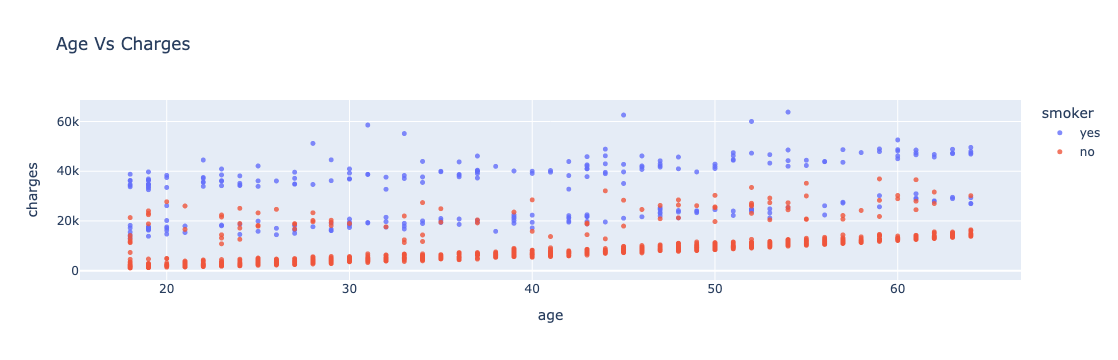

In [28]:
fig = px.scatter(medical_df,
                x='age',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='Age Vs Charges')
fig.update_traces(marker_size=5)
fig.show()

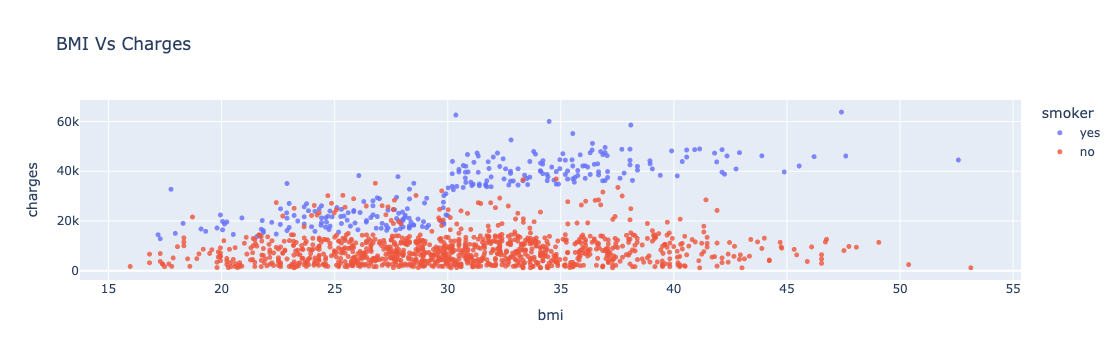

In [29]:
fig = px.scatter(medical_df,
                x='bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='BMI Vs Charges')
fig.update_traces(marker_size=5)
fig.show()

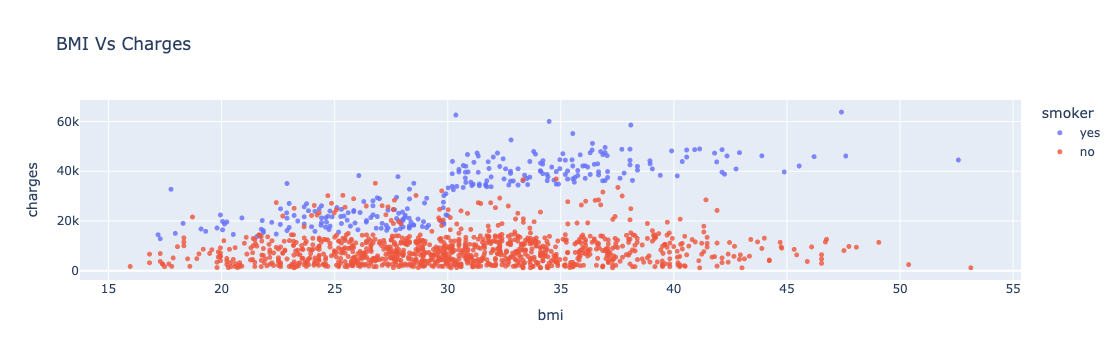

In [30]:
fig = px.scatter(medical_df,
                x='bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='BMI Vs Charges')
fig.update_traces(marker_size=5)
fig.show()

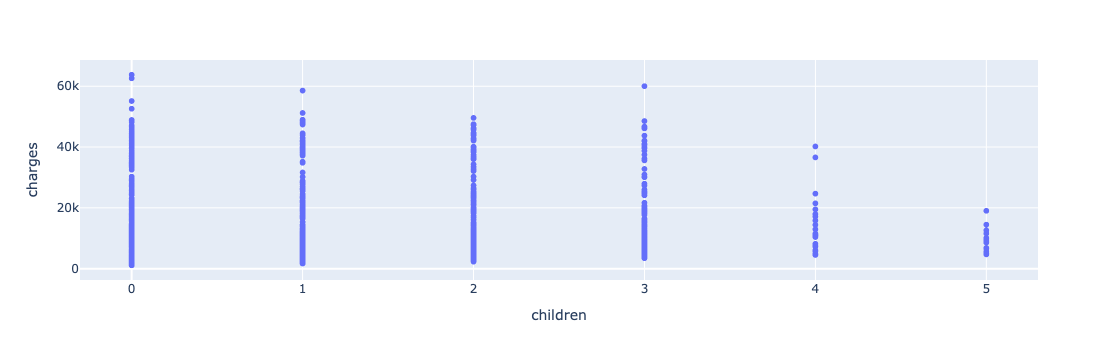

In [31]:
fig = px.scatter(medical_df,
                x='children',
                y='charges')
fig.show()

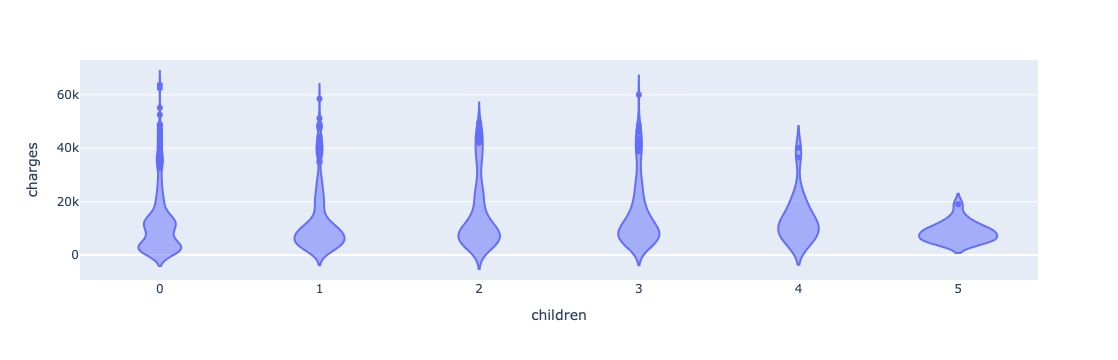

In [32]:
fig = px.violin(medical_df,
                x='children',
                y='charges')
fig.show()

In [33]:
fig = px.violin(medical_df,
                x='children',
                y='charges',
                box=True,
                points='outliers',
                color='smoker')
fig.show()

In [34]:
medical_df.charges.corr(medical_df.age)

np.float64(0.29900819333064754)

In [35]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362884)

In [36]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984772)

In [37]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


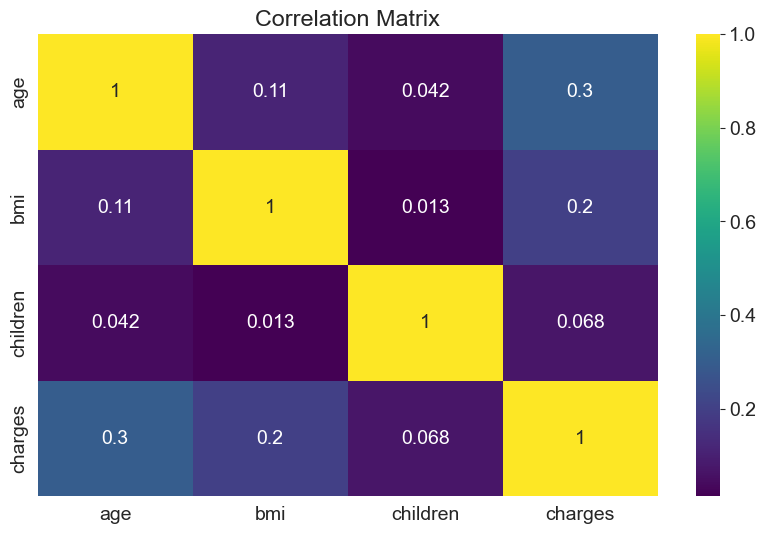

In [38]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='viridis', annot=True)
plt.title('Correlation Matrix');

In [39]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

Text(0.5, 1.0, 'Age vs. Charges For Non Smoker')

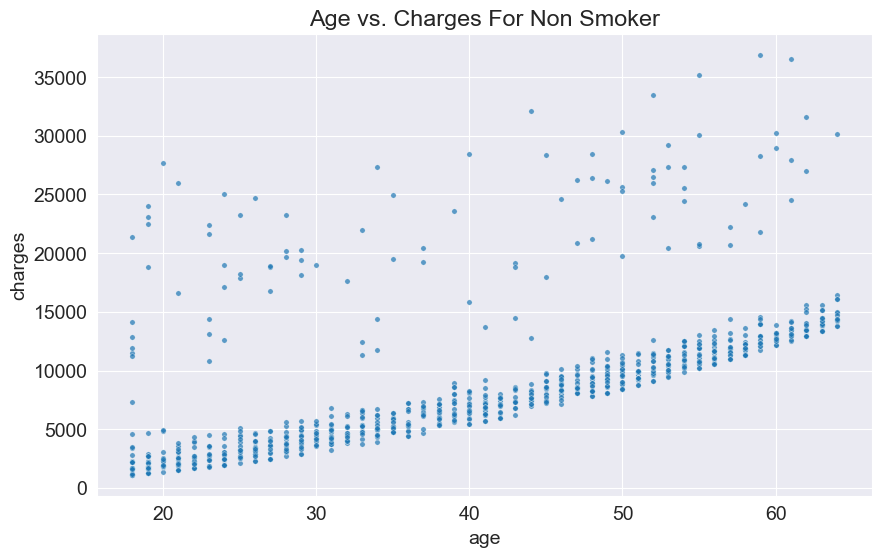

In [40]:
sns.scatterplot(data=non_smoker_df, 
                x='age', y='charges', 
                alpha=0.7, s=15)
plt.title('Age vs. Charges For Non Smoker')

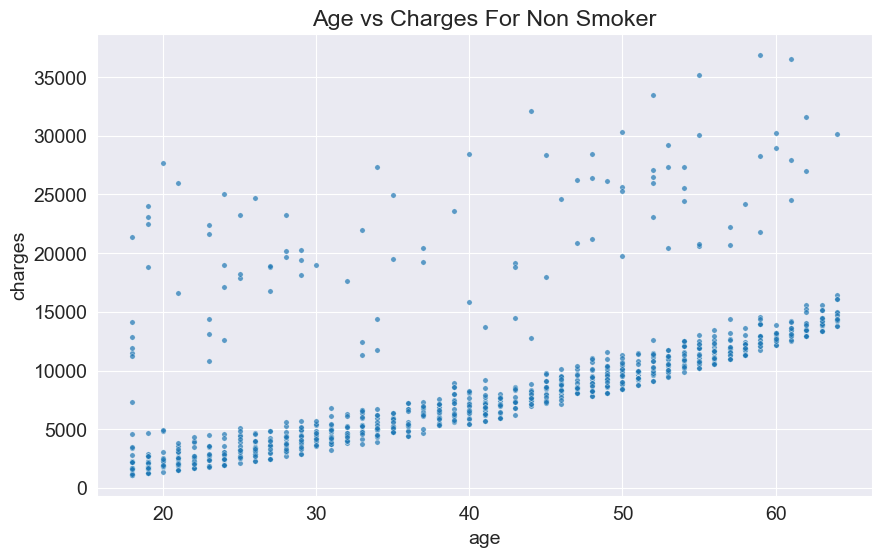

In [41]:
sns.scatterplot(data=non_smoker_df,
                x='age',
                y='charges',
                alpha=0.7,
                s=15)

plt.title('Age vs Charges For Non Smoker')
plt.show()

In [42]:
def estimate_charges(age, w, b):
    return w * age + b

In [43]:
w = 50
b = 100

In [44]:
estimate_charges(30, w, b)

1600

In [45]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [46]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [47]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

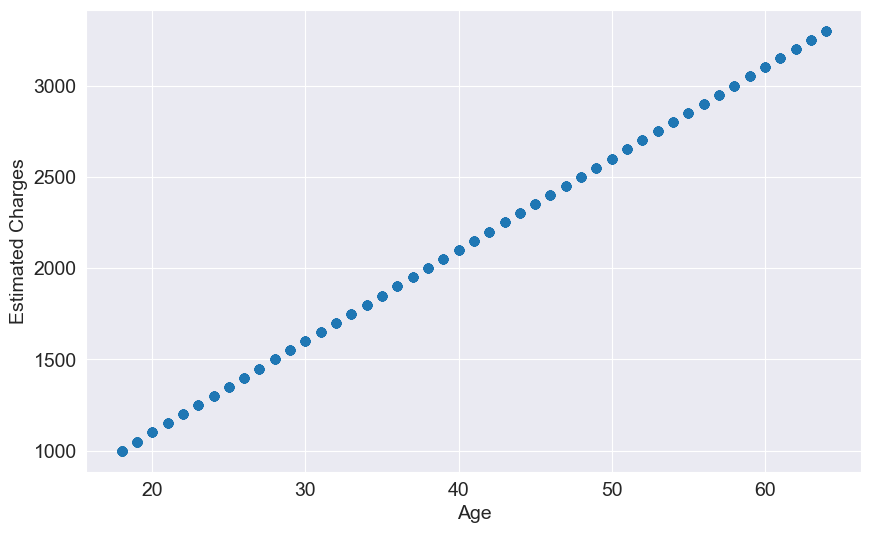

In [48]:
plt.scatter(ages, estimated_charges);
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

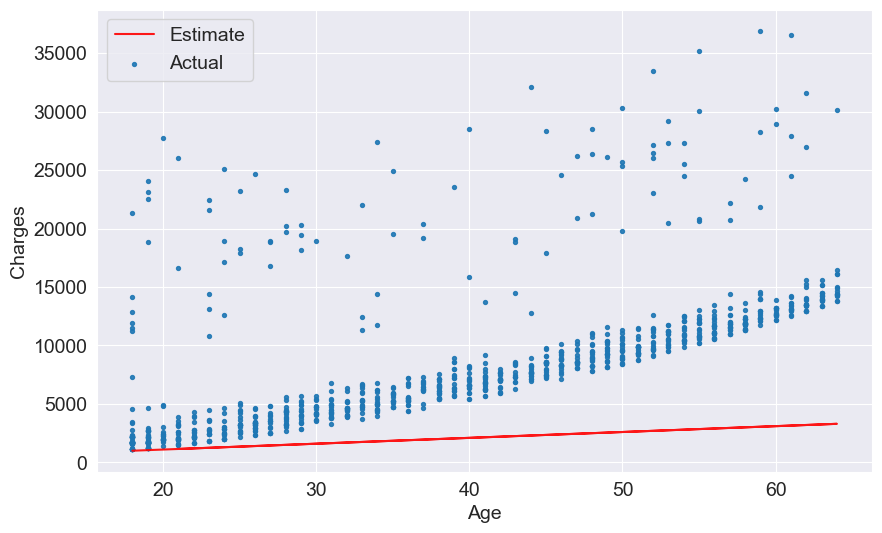

In [49]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8, alpha=0.9);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate' , 'Actual']);

In [50]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.9);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate' , 'Actual']);

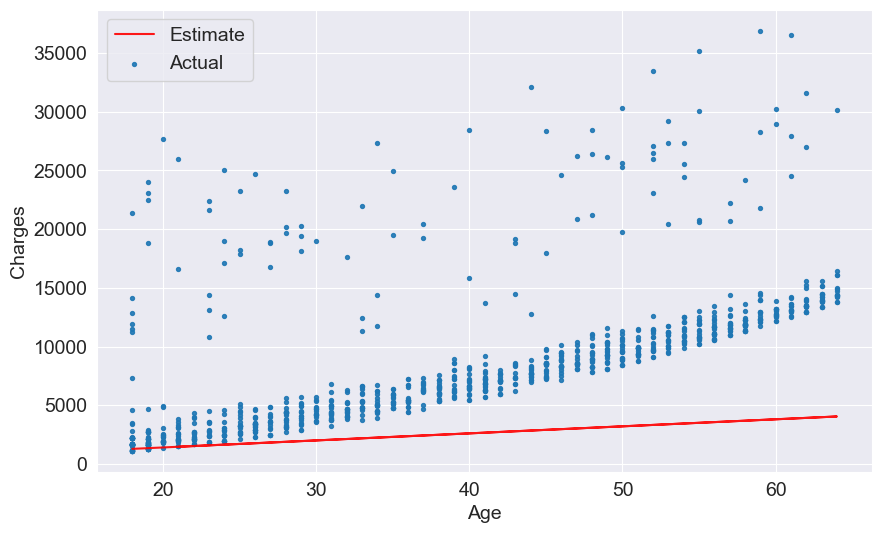

In [51]:
try_parameters(60, 200)

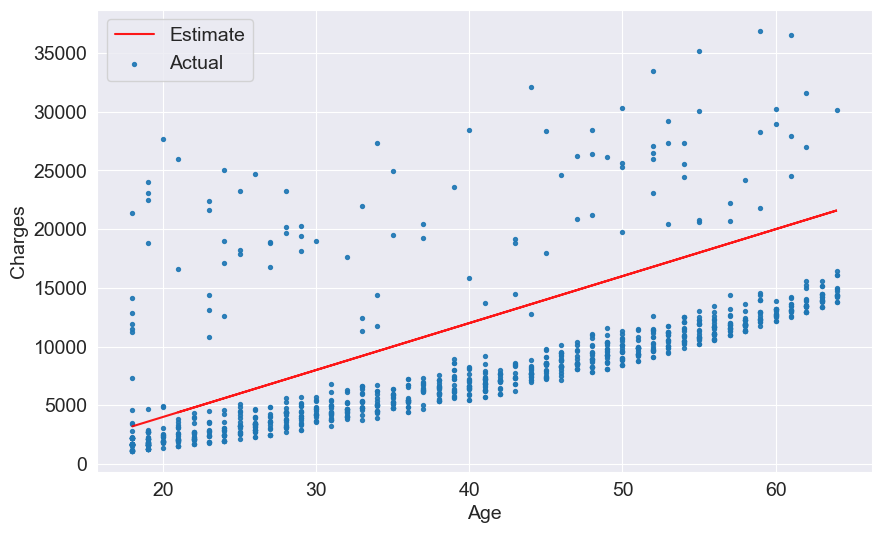

In [52]:
try_parameters(400, -4000)

In [53]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [54]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [55]:
 !pip install numpy --quiet

In [56]:
import numpy as np

In [57]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [58]:
w = 50
b = 100

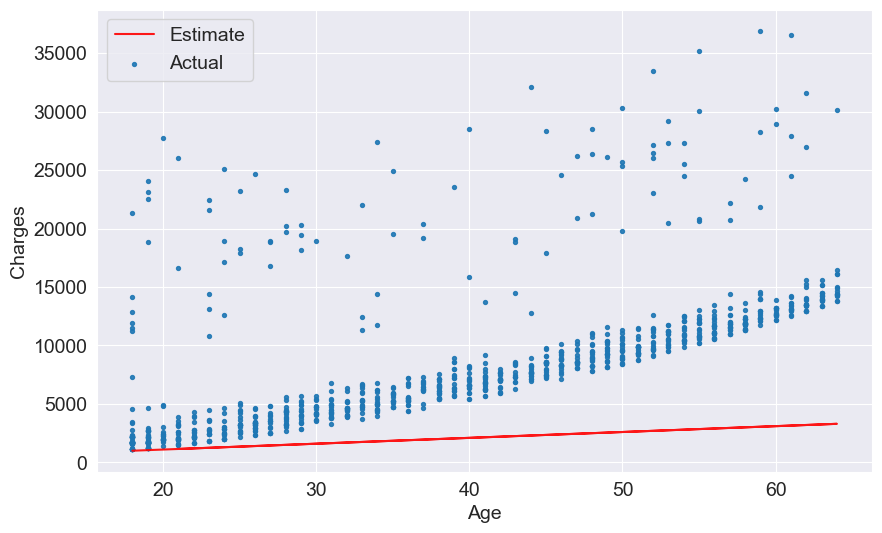

In [59]:
try_parameters(w,b)

In [71]:
targets = non_smoker_df.charges
predicted = estimate_charges(non_smoker_df.age, w, b)

In [72]:
rmse(targets,predicted)

np.float64(8461.949562575493)

In [73]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target,predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


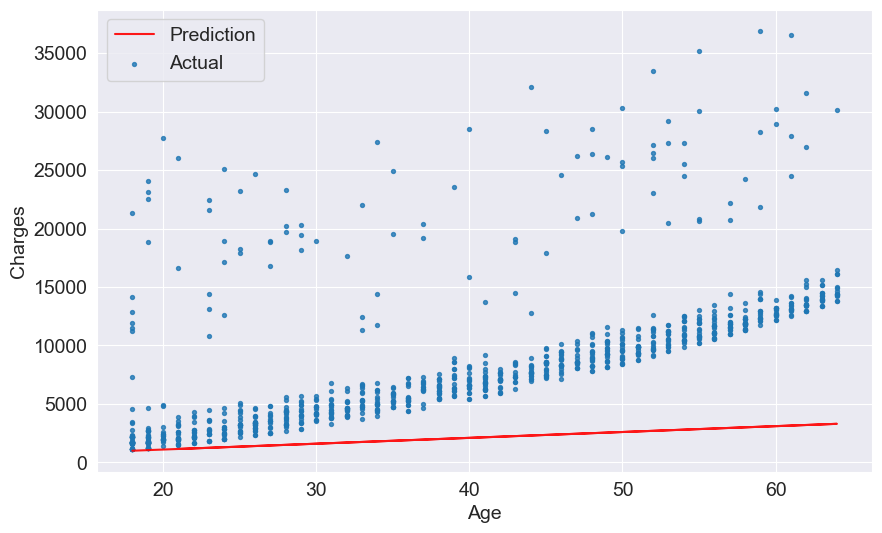

In [74]:
try_parameters(50,100)

RMSE Loss:  4852.971986648306


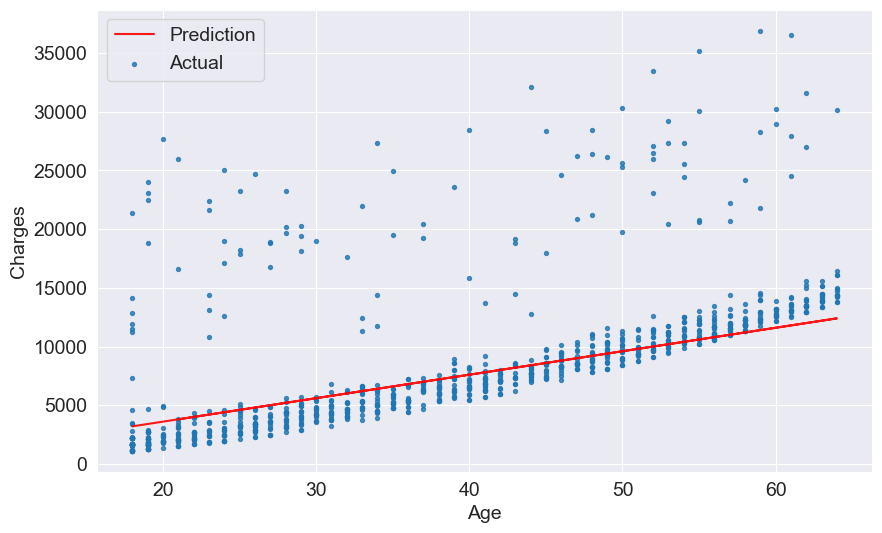

In [78]:
try_parameters(200,-400)

In [79]:
!pip install scikit-learn --quiet

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
model = LinearRegression()

In [82]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [83]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [84]:
model.fit(inputs, targets)

LinearRegression()

In [85]:
type(inputs)

pandas.core.frame.DataFrame

In [91]:
model.predict(
    pd.DataFrame({'age': [23, 37, 61]})
)

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [94]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [95]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [96]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

See the diff between actual(target) values and predicted values

In [98]:
model.coef_

array([267.24891283])

In [100]:
model.intercept_

np.float64(-2091.420556565021)

Our equestion is y = w*x + b , and x = charges, w = slope(model.coef_), b = intercept(model.intercept_)

RMSE Loss:  4662.505766636395


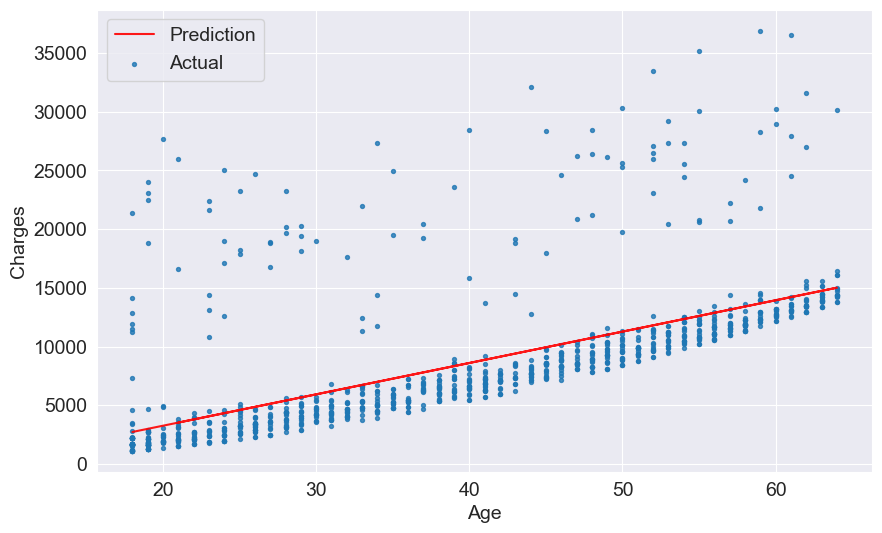

In [102]:
try_parameters(model.coef_,model.intercept_)

In [104]:
from sklearn.linear_model import SGDRegressor
import numpy as np

# Inputs & targets (same as before)
inputs = non_smoker_df[['age']]          # shape (n, 1)
targets = non_smoker_df.charges       # shape (n,)

# 1) Train SGDRegressor model (SGD-based linear regression)
sgd_model = SGDRegressor(
    loss="squared_error",   # MSE loss
    max_iter=2000,
    tol=1e-3,
    learning_rate="invscaling",
    eta0=0.01,
    random_state=42
)

sgd_model.fit(inputs, targets)

# 2) Predict
sgd_predictions = sgd_model.predict(inputs)

# 3) Compute RMSE loss (using your rmse function)
sgd_rmse = rmse(targets.values, sgd_predictions)
print("SGDRegressor RMSE:", sgd_rmse)

# Compare with LinearRegression (closed-form solution)
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(inputs, targets)
lr_predictions = lr_model.predict(inputs)
lr_rmse = rmse(targets.values, lr_predictions)
print("LinearRegression RMSE:", lr_rmse)

# Compare parameters
print("SGD w, b:", sgd_model.coef_[0], sgd_model.intercept_[0])
print("LR  w, b:", lr_model.coef_[0], lr_model.intercept_)


SGDRegressor RMSE: 4944.5404657566505
LinearRegression RMSE: 4662.505766636395
SGD w, b: 186.7134263143304 -112.93830911967767
LR  w, b: 267.248912831198 -2091.420556565021


inputs.shape: (274, 1)
targets.shape: (274,)
RMSE (Smokers): 10711.00334810241
w (slope): 305.23760210982874
b (intercept): 20294.12812691597


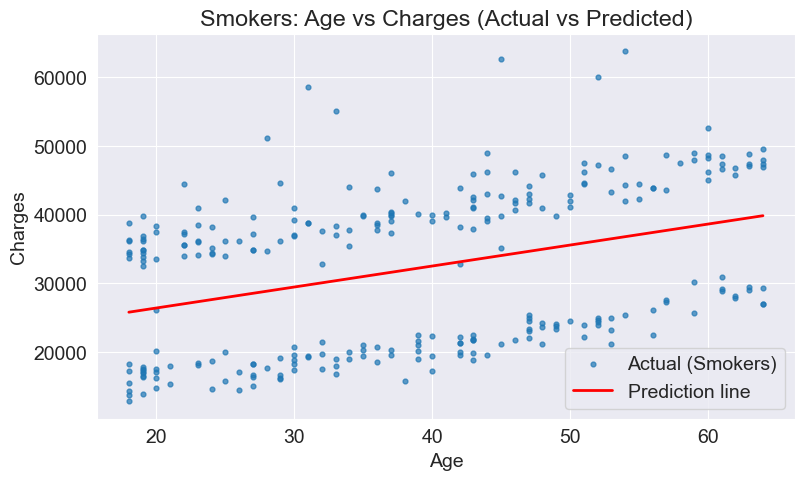

In [107]:
# Smoker-only Linear Regression (Age -> Charges)
# Includes: filter smokers, train, predict, visualize, RMSE loss, show w & b

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# If you don't already have rmse()
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

# 1) Filter smokers
smoker_df = medical_df[medical_df['smoker'] == 'yes'].copy()

# 2) Inputs (X) & Targets (y)
inputs = smoker_df[['age']]        # 2D: (n, 1)
targets = smoker_df['charges']     # 1D: (n,)

print("inputs.shape:", inputs.shape)
print("targets.shape:", targets.shape)

# 3) Train Linear Regression model
model = LinearRegression()
model.fit(inputs, targets)

# 4) Predict on the same inputs
predictions = model.predict(inputs)

# 5) Compute RMSE loss
loss = rmse(targets.values, predictions)
print("RMSE (Smokers):", loss)

# 6) Print model parameters (w and b)
w = model.coef_[0]
b = model.intercept_
print("w (slope):", w)
print("b (intercept):", b)

# 7) Visualize Actual vs Predicted
# Sort by age so the prediction line looks clean
sorted_idx = np.argsort(inputs['age'].values)
ages_sorted = inputs['age'].values[sorted_idx]
pred_sorted = predictions[sorted_idx]

plt.figure(figsize=(9, 5))
plt.scatter(inputs['age'], targets, s=12, alpha=0.7, label="Actual (Smokers)")
plt.plot(ages_sorted, pred_sorted, color="red", linewidth=2, label="Prediction line")

plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Smokers: Age vs Charges (Actual vs Predicted)")
plt.legend()
plt.show()


In [106]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395
